<a href="https://colab.research.google.com/github/Rahuldeshmukh142/AlmaBetter-Projects/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Predicting whether a customer will default on his/her credit card

## Problem Description 

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# Data Description 

## Attribute Information: 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler, Imputer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

### Initial Data Load

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
import xlrd

In [5]:
input_file = "/content/gdrive/My Drive/Alma Better Classification Project/default of credit card clients.xls"
dat = pd.read_excel(input_file)

In [6]:
dat.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploration

In [7]:
#Shape of the Data
dat.shape

(30000, 25)

Our dataset contains 30,000 observations of 25 raw features.

In [8]:
#data discription
dat.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
## Information about Data
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

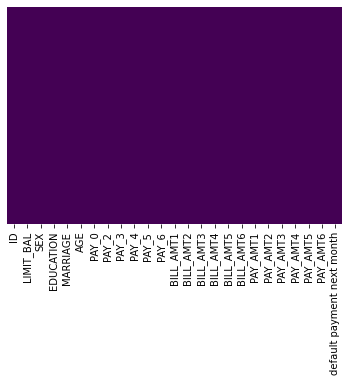

In [10]:
## Checking null values 
sns.heatmap(dat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

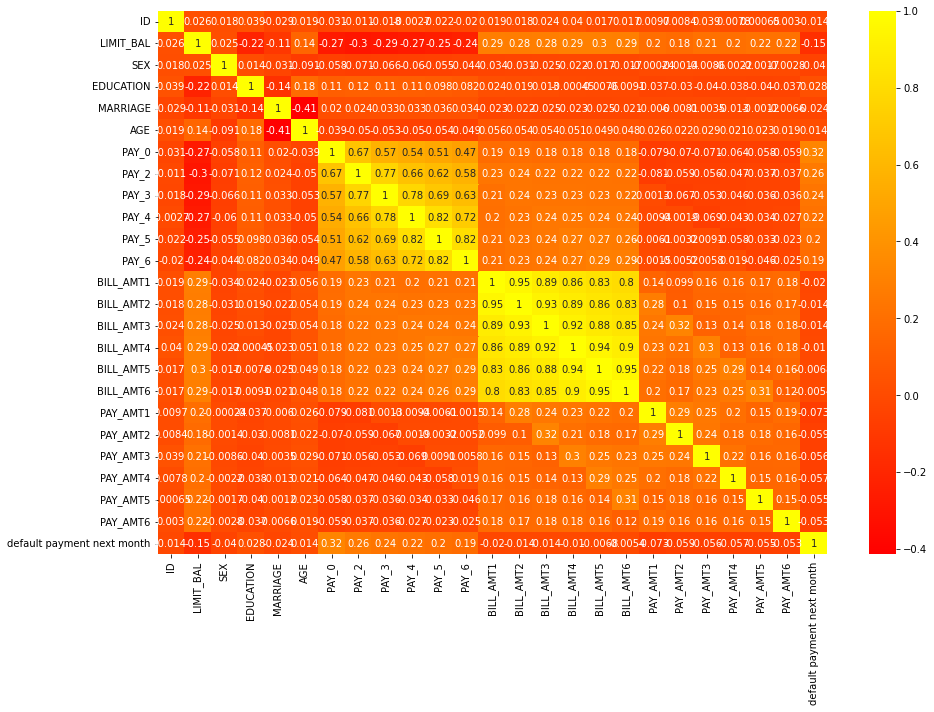

In [11]:
fig, ax = plt.subplots(figsize=(15,10))# checking the correlation so that we can decide which many variables are important.
sns.heatmap(dat.corr(), annot= True, cmap= "autumn",ax=ax)

In [12]:
dat.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### Individual Feature Exploration

Text(0.5, 1.0, 'SEX v/s COUNT')

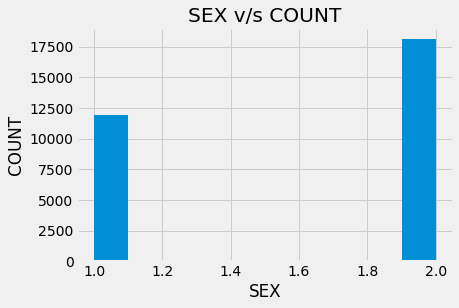

In [13]:
plt.style.use('fivethirtyeight')
dat['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

# Number of Male credit holder is less than Female

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

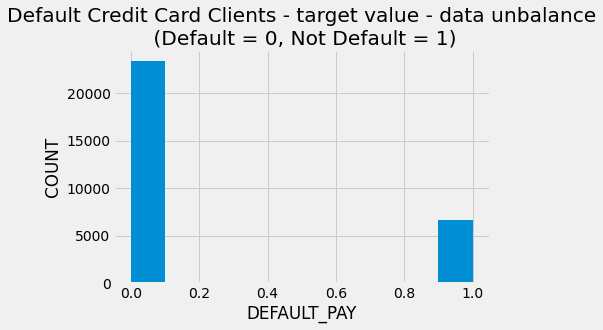

In [14]:
plt.style.use('fivethirtyeight')
dat["default payment next month"].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

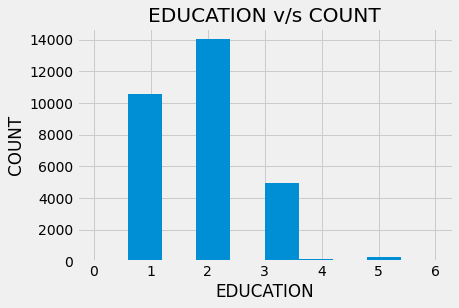

In [15]:
plt.style.use('fivethirtyeight')
dat['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

More number of credit holders are university students followed by Graduates and then High school students

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

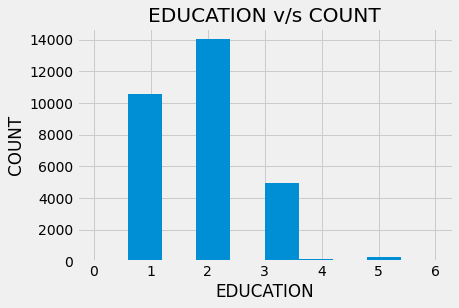

In [16]:
plt.style.use('fivethirtyeight')
dat['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

More number of credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

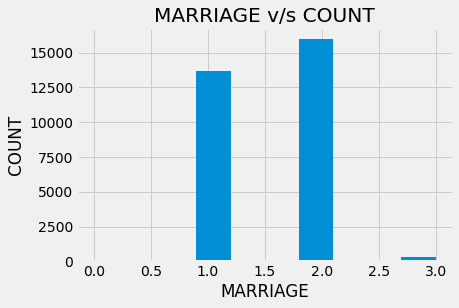

In [17]:
plt.style.use('fivethirtyeight')
dat['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

More number of credit cards holder are Married

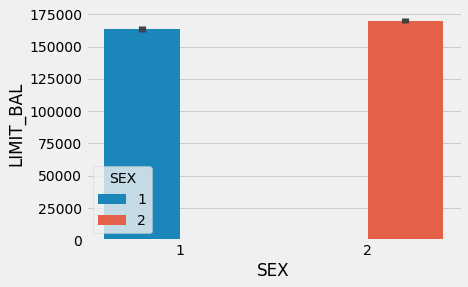

In [18]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dat,hue='SEX')

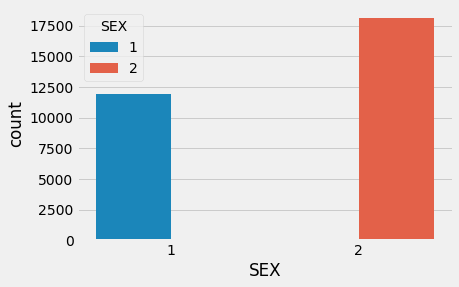

In [19]:
sns.countplot(x='SEX',data=dat,hue = 'SEX')

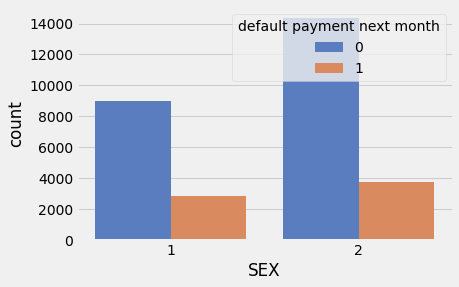

In [20]:
# Checking the number of counts of defaulters and non defaulters sexwise
sns.countplot(x='SEX', data=dat,hue="default payment next month", palette="muted") 

It is evident from the above output that females have overall less default payments wrt males

Non-Defaults have a higher proportion of Females (Sex=2)

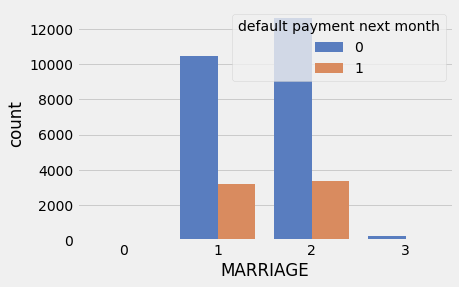

In [21]:
g=sns.countplot(x="MARRIAGE", data=dat,hue="default payment next month", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people

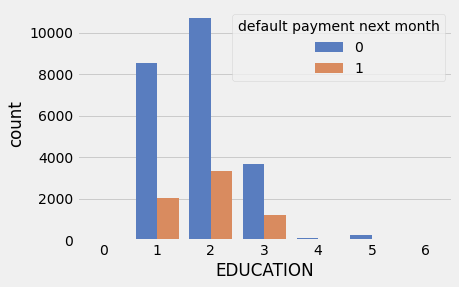

In [22]:
g=sns.countplot(x="EDUCATION", data=dat,hue="default payment next month", palette="muted")

From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

In [23]:
print(dat['LIMIT_BAL'].value_counts().nlargest(5))
print('\nNANs found:', sum(dat['LIMIT_BAL']==0) )

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

NANs found: 0


The 5 most common credit card limits. Besides being in the ten thousands, there was not much of a patern. There were also no cards without limits, or that had an unlisted limit.

In [24]:
print ("Gender: ")
print(dat['SEX'].value_counts()) 
print('NANs found: ', sum(dat['SEX']==0))

Gender: 
2    18112
1    11888
Name: SEX, dtype: int64
NANs found:  0


The dataset also had almost twice as many females listed as males, with none of the listed individuals having an unlisted sex.


In [25]:
print(dat['EDUCATION'].value_counts())
print('NANs found:', sum(dat['EDUCATION']==0) )

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
NANs found: 14


Most of the population has a university education and the majority has at least a high school education

In [26]:
print(dat['MARRIAGE'].value_counts())
print('NANs found:', sum(dat['MARRIAGE']==0) )

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
NANs found: 54


There is a pretty even dispersement of single and married in this data's population. We also have individuals who are divorced and very few that are under the category of "Others".

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
Name: AGE, dtype: int64
NANs found: 0


Text(0.5, 1.0, 'Age Distribution')

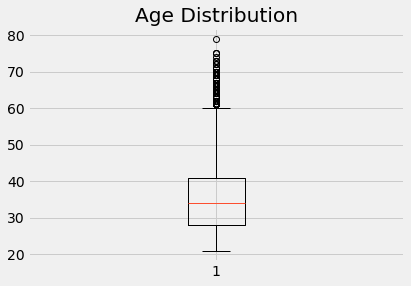

In [27]:
print(dat['AGE'].value_counts().nlargest(10))
print('NANs found:', sum(dat['AGE']==0)) 
plt.boxplot(dat['AGE']) 
plt.title("Age Distribution")

0       5249
2000    1363
3000     891
5000     698
1500     507
Name: PAY_AMT1, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'ADD TITLE')

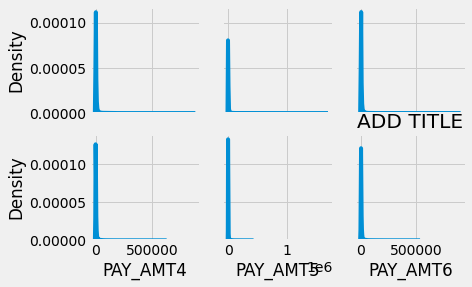

In [28]:
#things to consider, are the 0's here for the actual amount or representing nan
print(dat['PAY_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.distplot(dat['PAY_AMT1'], ax=ax[0,0])
sns.distplot(dat['PAY_AMT2'], ax=ax[0,1])
sns.distplot(dat['PAY_AMT3'], ax=ax[0,2])
sns.distplot(dat['PAY_AMT4'], ax=ax[1,0])
sns.distplot(dat['PAY_AMT5'], ax=ax[1,1])
sns.distplot(dat['PAY_AMT6'], ax=ax[1,2])
plt.title("ADD TITLE")

Looking at one of the six instances for previous payment amount we see the mode is 0. While it could be  case of having previous payment ammounts of zero, it may also be taking the place of a NAN. They may also be correlated to the six 'PAY' columns.

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


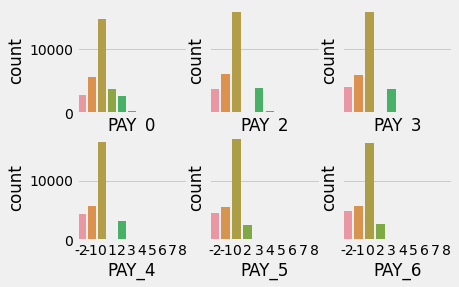

In [29]:
print(dat['PAY_0'].value_counts())
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.countplot(x="PAY_0", data=dat, ax=ax[0,0])
sns.countplot(x="PAY_2", data=dat, ax=ax[0,1])
sns.countplot(x="PAY_3", data=dat, ax=ax[0,2])
sns.countplot(x="PAY_4", data=dat, ax=ax[1,0])
sns.countplot(x="PAY_5", data=dat, ax=ax[1,1])
sns.countplot(x="PAY_6", data=dat, ax=ax[1,2])

 Looking at one of the six instances for previous payment amount we see the mode is 0, which means the minimum due amount was paid. -2 is included and the meaning is not described in the repo, but looking further we found 0 is minimum was paid, -1 balance was paid in full and -2 means no transactions occured that period. 

0      2008
390     244
780      76
326      72
316      63
Name: BILL_AMT1, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

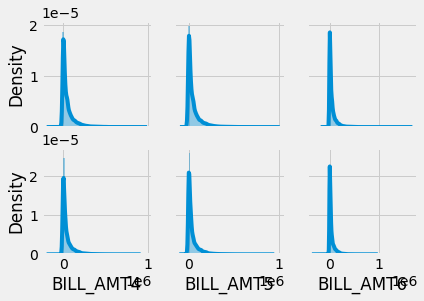

In [30]:
#things to consider, are the 0's here for the actual amount or representing nan
print(dat['BILL_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.distplot(dat['BILL_AMT1'], ax=ax[0,0])
sns.distplot(dat['BILL_AMT2'], ax=ax[0,1])
sns.distplot(dat['BILL_AMT3'], ax=ax[0,2])
sns.distplot(dat['BILL_AMT4'], ax=ax[1,0])
sns.distplot(dat['BILL_AMT5'], ax=ax[1,1])
sns.distplot(dat['BILL_AMT6'], ax=ax[1,2])

We found the 'Bill_AMT' variables contatin negative values in the case a customer overpays their bill. This could be caused by an automatic payment set if the bill for that month is not as high as the automatic payment is set for.

### Feature Correlation Exploration

Text(0.5, 1.0, 'Default by Education and Sex')

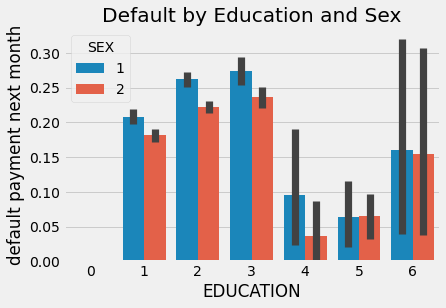

In [31]:
dat['default payment next month'].value_counts()
sns.barplot(x="EDUCATION", y="default payment next month", hue="SEX", data=dat)
plt.title("Default by Education and Sex")

As far as education goes there seems to be pretty equal likeliness for each class. Male's tend to have a high default rate for each which is interesting considering this set contains almost double the amount of females.

Text(0.5, 1.0, 'Distribution of Default by Age')

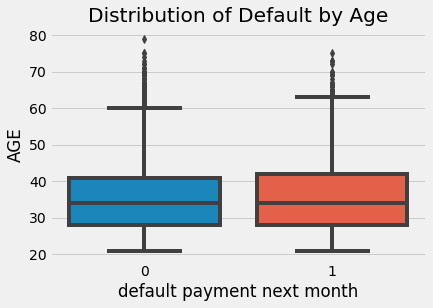

In [32]:
sns.boxplot(x="default payment next month", y="AGE", data=dat)
plt.title("Distribution of Default by Age")

When checking if the age at which individuals default was correlated by gender, it can be observed that the age at which the sexes default is relatively similar.

Text(0.5, 1.0, 'Distribution of Default by Sex and Age')

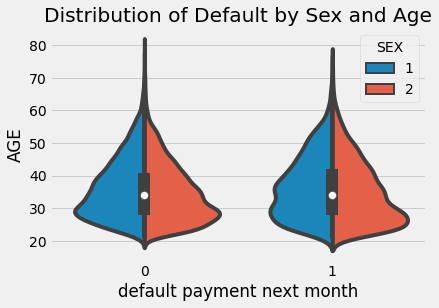

In [33]:
sns.violinplot(x="default payment next month", y="AGE", hue="SEX", data=dat, split=True)
plt.title("Distribution of Default by Sex and Age")

Below are violin plots where we visualize the distribution of ages based on an individual's sex and whether or not they default the next month. It was interesting to see that the two samples of those who default and those who didn't seemed to have similar distribution shapes, so by just looking only at a person's sex and age may not be the best to see if whether a person will default or not.

# Preprocessing

### Feature Manipulation


In [34]:
dat['EDUCATION'].loc[dat['EDUCATION'] == 6]=5
dat['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Since the Education column contained two unnamed values: 5 and 6, we decided to make both values 5 and delegate 5 as unknown.

### Derived Features

In [35]:
total_balance=dat[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
dat['total_balance']=total_balance.sum(axis=1)

As part of our preprocessing, we decided to derive more features. We first summed the bill amount of each person between April 2005 -August 2005 since we were provided corresponding information on the payments for these specific months.

In [36]:
total_pay_amount=dat[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5']]
dat['total_pay_amount']=total_pay_amount.sum(axis=1)

In [37]:
dat['total_diff']=dat['total_balance']-dat['total_pay_amount']

Not only are the total balances and total amounts important, but we also decided that looking at the difference between the two amounts might be valuable. We subtracted the total_pay_amount from total_balance in which we decided to see how much was left of the person's credit card balance between a specific time period.

In [38]:
pay_len=dat[['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
dat['pay_over_time']=pay_len.sum(axis=1)

Another derived feature was summing the total pay information for each individual in which we could get an overall view of whether a person does not use their credit card too often or is consistently late on payments.

In [39]:
dat['total_no_cons']=(pay_len ==-2 ).sum(axis=1)
dat['total_full_pay']=(pay_len ==-1 ).sum(axis=1)
dat['revolve_credit']=(pay_len ==0 ).sum(axis=1)
dat['late_pays']=(pay_len >0 ).sum(axis=1)

Because the values inputted in the PAY columns are negative and positive, the  sum of these values do not show enough information of the person's credit card payment patterns. We decided to create four other features to reflect how many times they didn't use their credit card, paid their bill in full, used their revolving credit, and how many total months they were late on payments.

### Data Separation

In [40]:
as_category = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']

Several other features also represented factors better than they represented numeric values. For example, gender, marriage, and education also do not follow the standard numerical rulesare better as categories. The individual Pay columns also benefit from being factors. 

In [41]:
as_numeric = ['ID','LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6','total_balance','total_pay_amount','total_diff',
             'pay_over_time','total_no_cons','total_full_pay','revolve_credit','late_pays']

Array of numeric data labels

In [42]:
labels = ['default payment next month']

Vector of output labels

### Preprocessing Definitions

In [43]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
         return X[self.attribute_names]

In [44]:
class DummyEncoder(TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def transform(self, X, y=None, **kwargs):
        return pd.get_dummies(X, columns=self.columns)
    def fit(self, X, y=None, **kwargs):
        return self

### Pipelines

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
num_pipe=Pipeline([
        ("selector", DataFrameSelector(as_numeric)),
        ("scale", StandardScaler())
        ])

In [47]:
cat_pipe=Pipeline([
        ("selector", DataFrameSelector(as_category)),
        ("convert", DummyEncoder(columns=as_category)),
        ("scale", StandardScaler())
        ])


In [48]:
full_pipeline = FeatureUnion(transformer_list=[
        ("cat_pipeline", cat_pipe ),
        ("num_pipeline", num_pipe ),
        ])

In [49]:
dat_prepared = full_pipeline.fit_transform(dat)

# Create Train and Test Sets


We reserved 30% of the data for the test set, the remainder acting as the training set.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(dat_prepared,dat[labels], test_size=0.3)

# Dimensionality Reduction


### PCA

In [51]:
pca = PCA(n_components = 25)
X25D = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.12550862 0.06563589 0.0608246  0.0544821  0.04493129 0.03783439
 0.03137806 0.02732305 0.02667998 0.02457506 0.02272563 0.02163059
 0.02028199 0.01973916 0.01757892 0.01597308 0.01583284 0.01509079
 0.01429882 0.01287175 0.01192677 0.01165421 0.01147504 0.01095633
 0.01062554]


We first used PCA to find the optimum number of dimensions, with 25 dimensions, the original number of dimensions before derived and dummie features were added, we see about 12% of the datas variance lies along the first axis.

54
[0.12550862 0.06563589 0.0608246  0.0544821  0.04493131 0.03783441
 0.03137823 0.02732358 0.02668066 0.02457627 0.02272771 0.0216331
 0.02029044 0.01974464 0.01759622 0.01597851 0.0158463  0.01510974
 0.01438701 0.01297852 0.01210075 0.01173606 0.01163569 0.01125107
 0.01084007 0.01061741 0.01026123 0.010198   0.01003895 0.00986832
 0.0095852  0.00942331 0.00936655 0.00913613 0.00892247 0.00827547
 0.00821834 0.00808885 0.00786564 0.00778587 0.00757296 0.00750886
 0.00700003 0.00688962 0.00656502 0.00640896 0.00617601 0.00557162
 0.00519243 0.00509966 0.00476528 0.00455501 0.00430691 0.00403873]


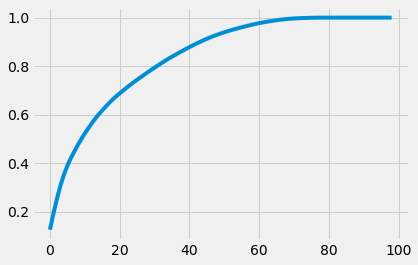

In [52]:
pca2 = PCA()
pca2.fit(X_train)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
pca2 = PCA(n_components = d)
XdD = pca2.fit_transform(X_train)
print(pca2.explained_variance_ratio_)
plt.plot(cumsum)

We then ran a form of PCA which would find the number of copmonents which would be required to get 95%. After running this we saw 50 was the minimum number of components needed to preserve 95% of the training set's variance. We plotted the cumsum and found the elbow to appear around 50. Since 50 principle components is not ideal we decided to explore other dimensionality reduction techniques. 

### LLE

Since PCA did not work well with our dataset, we moved onto locally linear embedding to try and reduce our dimensions. Using LLE we reduced our dimensions to 2. We later tested the reduced dimensions with LLE.

In [53]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X_train)

# Models

### Logistic Regression

In [54]:
clf_reg=LogisticRegression()
clf_reg.fit(X_train,Y_train)
Y_pred_logr=clf_reg.predict(X_train)
Y_predict_logr=clf_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
print("Score of Logistic Regression Model on train: ","{0:.4f}".format(clf_reg.score(X_train,Y_train)))

Score of Logistic Regression Model on train:  0.8222


For our first classifier model, we developed a Logistic Regression model. We printed out the score of the model on the trained data set versus the test data set. Based on the two scores we can see that there is no issue of an overfit, and that the model has over an 82.33% accuracy.

### Logistic Regression with LLE

In [56]:
clf_reg_lle=LogisticRegression()
clf_reg_lle.fit(X_reduced,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [57]:
print("Score of Logistic Regression Model with LLE on train: ","{0:.4f}".format(clf_reg_lle.score(X_reduced,Y_train)))

Score of Logistic Regression Model with LLE on train:  0.7780


By using the training test produced from LLE we actually saw about a 5% decrease in accuracy. Although it was unfortunate not to see our accuracy improve, the model would be adequate for a situation where the results need to be explained.

### SVC

In [58]:
svm_clf=LinearSVC()
svm_clf.fit(X_train,Y_train)
Y_train_pred_svm=svm_clf.predict(X_train)
Y_predict_clf=svm_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [59]:
print("Score of SVM Regression Model on train: ",svm_clf.score(X_train,Y_train))

Score of SVM Regression Model on train:  0.8220952380952381


We then developed a Support Vector Machine model, specifically a Soft Margin Classifier (SVC). For this model, we also looked at the score on the train and test set in order to see the model's overall performance. We do see a difference in perfomance if we compared this model to a simple logistic regression model. Our score for the Soft Margin Classifier is in fact very similar to the Logistic Regression model.

### SVC with LLE

In [60]:
svm_clf_lle=LinearSVC()
svm_clf_lle.fit(X_reduced,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [61]:
print("Score of SVM Regression Model with LLE on train: ","{0:.4f}".format(svm_clf_lle.score(X_reduced,Y_train)))

Score of SVM Regression Model with LLE on train:  0.7780


Similar to Logistic Regression, the accuracy did not improve with the set from dimensionality reduction.

# Fine Tuning

In [62]:
logreg_grid=[
    {'C':[0.001, 0.01, 0.1, 1, 1.01,1.1],
     'max_iter':[100,1000],'warm_start':['True','False']},
]
log_reg=LogisticRegression()
grid_search=GridSearchCV(log_reg,logreg_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 1.01, 1.1],
                          'max_iter': [100, 1000],
                          'warm_start': ['True', 'False']}],
             scoring='neg_mean_squared_error')

Since the Logistic Regression model slightly performed better than a SVM Classifier, we decied to fine tune the Logistic Regression model. GridSearchCV was implemented in order to find the best hyperparameters.

In [63]:
print("Best Parameters:",grid_search.best_params_)

Best Parameters: {'C': 0.01, 'max_iter': 100, 'warm_start': 'True'}


In [64]:
best_c_param=grid_search.best_params_.get('C')
best_max_iter_param=grid_search.best_params_.get('max_iter')
best_warm_start_param=grid_search.best_params_.get('warm_start')

We then stored a copy the best hyperparameter values in order to tune our model and begin training again.

# Re-Tuned Model

We now begin to retrain our re-tuned Logistic Regression model in comparison with a Logistic Regression model with LLE dimensionality reduction.

### Logistic Regression

In [65]:
clf_reg_retuned=LogisticRegression(C=best_c_param,max_iter=best_max_iter_param,
                                  warm_start=best_warm_start_param)
clf_reg_retuned.fit(X_train,Y_train)
Y_pred_logr_retuned=clf_reg_retuned.predict(X_train)
Y_predict_logr_retuned=clf_reg_retuned.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print("Score of Logistic Regression Model on train: ","{0:.4f}".format(clf_reg_retuned.score(X_train,Y_train)))

Score of Logistic Regression Model on train:  0.8222


### Logistic Regression using LLE

In [67]:
clf_reg_lle_retuned=LogisticRegression(C=best_c_param,max_iter=best_max_iter_param,
                                  warm_start=best_warm_start_param)
clf_reg_lle_retuned.fit(X_reduced,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, warm_start='True')

In [68]:
print("Score of Logistic Regression Model with LLE on train: ","{0:.4f}".format(clf_reg_lle_retuned.score(X_reduced,Y_train)))

Score of Logistic Regression Model with LLE on train:  0.7780


Based on the scores of the Logistic Regression model and the Logistic Regression model with LLE dimensionality reduction after being re-tuned, we noticed the model performed slightly better without the use of LLE, so we have decided to try an ensemble method.

# Ensemble Learning

## Bagging Classifier

Because our previous models were not improving as much as we would have liked, we then turned to ensemble learning. For our first method, we tried a Bagging Classsifier using a Decision Tree Classifier.

Many of the parameters were manually adjusted while looking at the score on the training and test set.

In [69]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(splitter='random',max_depth=10,max_features=47),n_estimators=500,
    max_samples=320,bootstrap=True,n_jobs=-1,oob_score=False)
bag_clf.fit(X_train,Y_train.values.ravel())
predict_bagging=bag_clf.predict(X_test)

In [70]:
print("Decision Tree Classifier with Bagging Score on Training: ", "{0:.4f}".format(bag_clf.score(X_train,Y_train)))

Decision Tree Classifier with Bagging Score on Training:  0.8229


In [71]:
print("Decision Tree Classifier with Bagging Score on Test :","{0:.4f}".format(bag_clf.score(X_test,Y_test)))

Decision Tree Classifier with Bagging Score on Test : 0.8206


Below we can see the two scores on the training and test set in which this method showed slight improvements from our previous models. Not only that, but we can see that we are not overfitting since our score on the test set did not have a significantly large difference compared to the training set.

## Voting Classifier

We then implemented a Voting Classifier using 3 of our previous models: Logistic Regression, LinearSVC, and DecisionTreeClassifier. A new model added was a Random ForestClassifier.

In [72]:
log_clf=LogisticRegression(C=best_c_param,max_iter=best_max_iter_param,
                                  warm_start=best_warm_start_param)
rnd_clf=RandomForestClassifier(bootstrap=True,max_depth=5,max_features=30,
                               n_estimators=155)
svm_clf=LinearSVC(C= 0.01, loss= 'squared_hinge')
dt_clf=DecisionTreeClassifier(splitter='random',max_depth=10,max_features=47)
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),
               ('rf',rnd_clf), ('svc',svm_clf),('dt',dt_clf)],voting='hard')
voting_clf.fit(X_train, Y_train.values.ravel())
predict_voting=voting_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [73]:
for class_algo in (log_clf, rnd_clf,svm_clf,dt_clf,voting_clf):
    class_algo.fit(X_train,Y_train.values.ravel())
    y_pred=class_algo.predict(X_test)
    print(class_algo.__class__.__name__,
         accuracy_score(Y_test,y_pred))

LogisticRegression 0.8196666666666667
RandomForestClassifier 0.8214444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC 0.8195555555555556
DecisionTreeClassifier 0.8151111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


VotingClassifier 0.8196666666666667


To see our overall performance from the Voting Classifier, we printed out the accuracy score of each model used within the classifier as well as the overall accuracy score of the model.

# Evaluation

To evaluate three of our top models, we will focus on the confusion matrices, classification model, and accuracy scores in order to see  the models' performances with classification.

## Logistic Regression

### Confusion Matrix

In [74]:
confusion_matrix(Y_test,Y_predict_logr)

array([[6701,  325],
       [1290,  684]])

Below is the confusion matrix for the logistic regression model.  In counter clockwise order, we have true negatives, false negatives, true positives, and then false positives. We notice that for our Logistic Regression model we had many true negatives which means we had many correct guesses for a person not defaulting on their credit card. 

### Classification Report

A classification report was then ran in which we now see the precision and recall values.

In [75]:
print(classification_report(Y_test,Y_predict_logr))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7026
           1       0.68      0.35      0.46      1974

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### ROC

In [76]:
from sklearn.linear_model import SGDClassifier

In [77]:
y_scores_reg = cross_val_predict(clf_reg, X_test, Y_test.values.ravel(), cv=3, 
method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


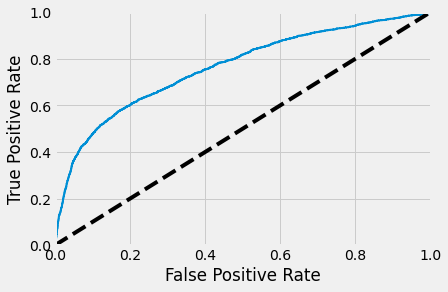

In [78]:
# y_scores_reg= cross_val_predict(sgd_clf, X_train, y_train_5.iloc[:,0], cv=3, 
# method="decision_function")

# y_scores_reg = cross_val_predict(clf_reg, X_test, Y_test, cv=3,method="decision_function")
fpr, tpr, thresholds = roc_curve(Y_test, y_scores_reg)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

Looking at the plot for Logistic Regression's true positive rate versus false positive rate we see our classifier is mediocre. We did not see as much of a curve in the line representing the sensitivity as we would have preferred.

In [79]:
roc_auc_score(Y_test, y_scores_reg)

0.7622049207300946

From the ROC's Area Under the Curve score we see the performance is almost half way between the classifier being "perfect" and completely random.

## Bagging Classifier

### Confusion Matrix

Below is the confusion matrix for the Bagging Classifier.

In [80]:
confusion_matrix(Y_test,predict_bagging)

array([[6687,  339],
       [1276,  698]])

### Classification Report

In order to see the performance, we looked further at the classification report.

In [81]:
print(classification_report(Y_test,predict_bagging))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7026
           1       0.67      0.35      0.46      1974

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### ROC

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


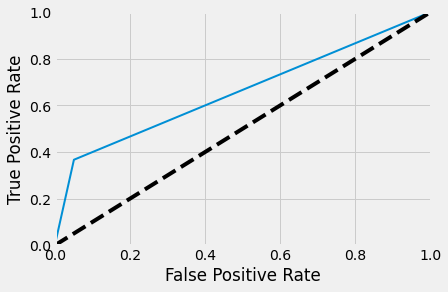

In [82]:
y_scores_bag = cross_val_predict(bag_clf, X_test, Y_test, cv=3)
fpr, tpr, thresholds = roc_curve(Y_test, y_scores_bag)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

The ROC of the bagging classier showed a sharp curve, but this curve was even closer to the line representing a completely random classifier than Logistic Regression.

In [83]:
roc_auc_score(Y_test, y_scores_bag)

0.6579783556862613

Which is understandable when seeing the ROC AUC of bagging was a lot closer to the "random" performance standard.

## Voting Classifier

Below is the confusion matrix for the Voting Classifier.

### Confusion Matrix

In [84]:
confusion_matrix(Y_test,predict_voting)

array([[6717,  309],
       [1305,  669]])

In order to see the performance, we looked further at the classification report.

### Classification Report

In [85]:
print(classification_report(Y_test,predict_voting))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7026
           1       0.68      0.34      0.45      1974

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



### ROC

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

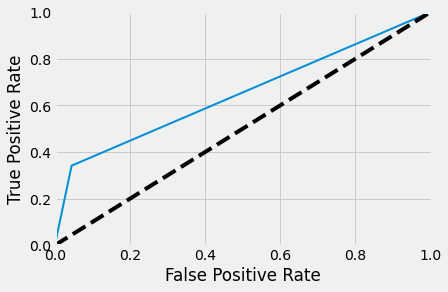

In [86]:
y_scores_voting = cross_val_predict(voting_clf, X_test, Y_test, cv=3)
fpr, tpr, thresholds = roc_curve(Y_test, y_scores_voting)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

Lastly the ROC plot for the voting classifier was almost the same as the plot for the bagging classifier. The curve did appear a little lower in the following plot.

In [87]:
roc_auc_score(Y_test, y_scores_voting)

0.6483737779865839

## Model Accuracies

From all of our training on different learning algorithms, below we can compare the accuracy scores from all of our used models in order to see how well we are able to determine whether a person defaults on their credit card or not.

In [88]:
print("Accuracy of Logistic Regression Model: ",
      float("{0:.4f}".format(accuracy_score(Y_test,Y_predict_logr))))
print("Accuracy of SVC Model: ",
      float("{0:.4f}".format(accuracy_score(Y_test,Y_predict_clf))))
print("Accuracy of Bagging Classifier: ",
      float("{0:.4f}".format(accuracy_score(Y_test,predict_bagging))))
print("Accuracy of Voting Classifier: ",
      float("{0:.4f}".format(accuracy_score(Y_test,predict_voting))))

Accuracy of Logistic Regression Model:  0.8206
Accuracy of SVC Model:  0.8198
Accuracy of Bagging Classifier:  0.8206
Accuracy of Voting Classifier:  0.8207


Once again, the Voting Classifier's ROC AUC score is only a little lower than the Bagging Classifier's. Showing the classifier performs closer to the "random" side.

# Conclusion

  After exploring, manipulating and experimenting with different models on the credit card default data set we have obtained a maximum accuracy of 82% to determine whether a person defaults on their credit card or not. Ideally we would have been able to increase this accuracy by trying out various ways of preprocessing the data, utilizing dimensionality reduction, fine-tuning the models' hyperparameters, and applying ensemble learning. 
  
   First we derived new features from the data set. Since this resulted in about 100 features we explored dimensionality reduction. Using the second form of reduction, LLE, we ran our initial classification models, Logistic Regression and Support Vector Classifier with original training set and the reduced set. Seeing no improvement with the set produced in LLE we continued using our original training set.
   
  Next we fine-tuned the better performing model, Logisitic Regression, with GridSearchCV as another attempt to improve the model. After using GridSearchCV no significant improvements were seen. 
  
  This led us to trying ensemble learning to see if our overall accuracy could be improved by combining various models' predictions. Once again there did not seem to be a significant improvement in both the Bagging Classifier and Voting Classifier  when compared to our Logisitic Regression model.
  
  In the end, looking at the accuracy scores of each model was not enough information to choose which model performed best when trying to predict whether or not a person would default on their credit card. Above one can clearly see how close all these accuracy scores fall. In fact, by just seeing the accuracy scores the Voting Classifier seems to perform the best. But if looks at performance via ROC curves the Logistic Regression model seems to perform the best and the Voting Classifier does significantly worse.
  
  For future work, we think it would be interesting to develop more complex models, such as implementing a neural network and seeing if there could be a better performance of an 82% accuracy score since all our previous techniques did not seem to effect the accuracy.
  